In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/cubic_zirconia.csv")

In [ ]:
df.head()

,S.No,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
df.shape

(26967, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.No     26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
numerical_cols = []
for col in df.columns:
    if df[col].nunique() >= 9:  # Consider columns with at least 9 unique values
        numerical_cols.append(col)

print("Numerical Columns (with at least 9 unique values):", numerical_cols)
print("Total number of numerical columns (with at least 9 unique values):", len(numerical_cols))


Numerical Columns (with at least 9 unique values): ['S.No', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Total number of numerical columns (with at least 9 unique values): 8


In [ ]:
categorical_cols = []
for col in df.columns:
    if df[col].nunique() <= 9:  # Consider columns with 9 or fewer unique values
        categorical_cols.append(col)

print("Categorical Columns:", categorical_cols)
print("Total number of categorical columns:", len(categorical_cols))


Categorical Columns: ['cut', 'color', 'clarity']
Total number of categorical columns: 3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.No     26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
#finding missing
df.isnull().sum()

,0
S.No,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0


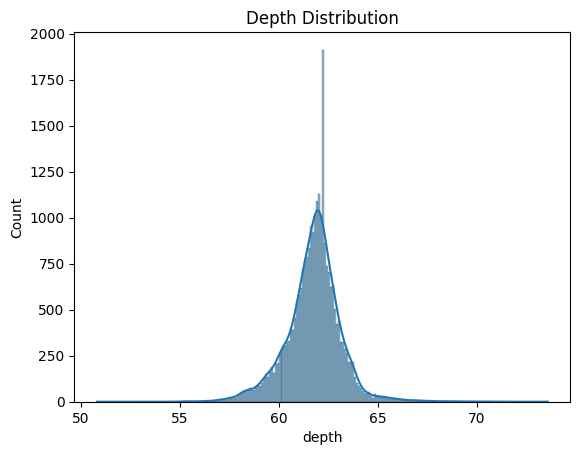

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['depth'], kde=True)
plt.title('Depth Distribution')
plt.show()


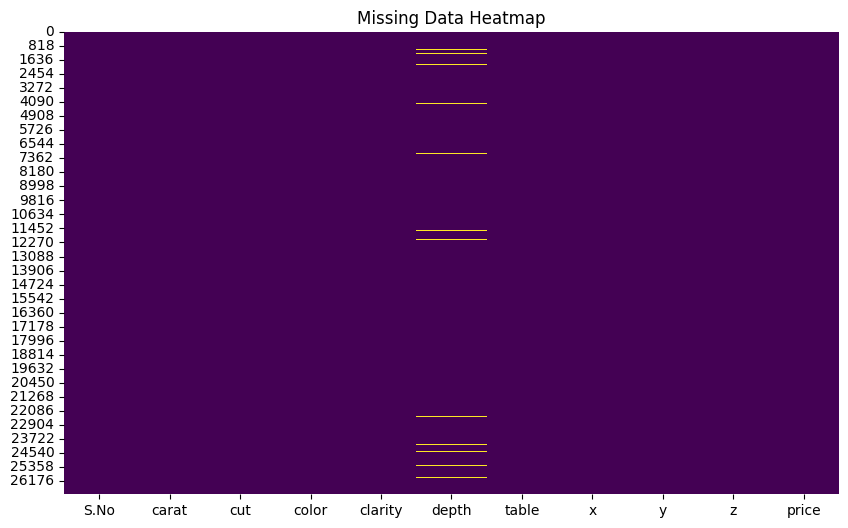

In [ ]:

column_name = 'depth'

# Step 1: Visualize the missing data pattern
# Heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
for i in["depth"]:
  df[i].fillna(df[i].median(),inplace=True)


<ipython-input-4-41758bf87d3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)


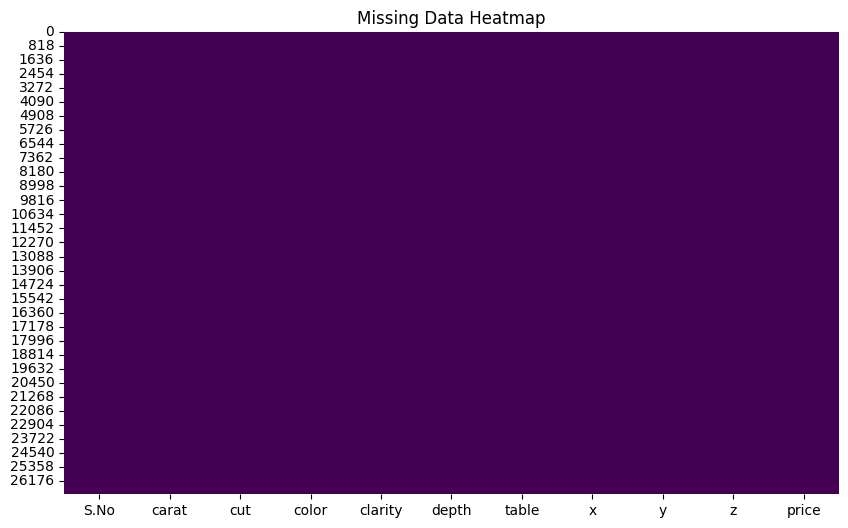

In [ ]:
column_name = 'depth'

# Step 1: Visualize the missing data pattern
# Heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
df.duplicated().sum()

0

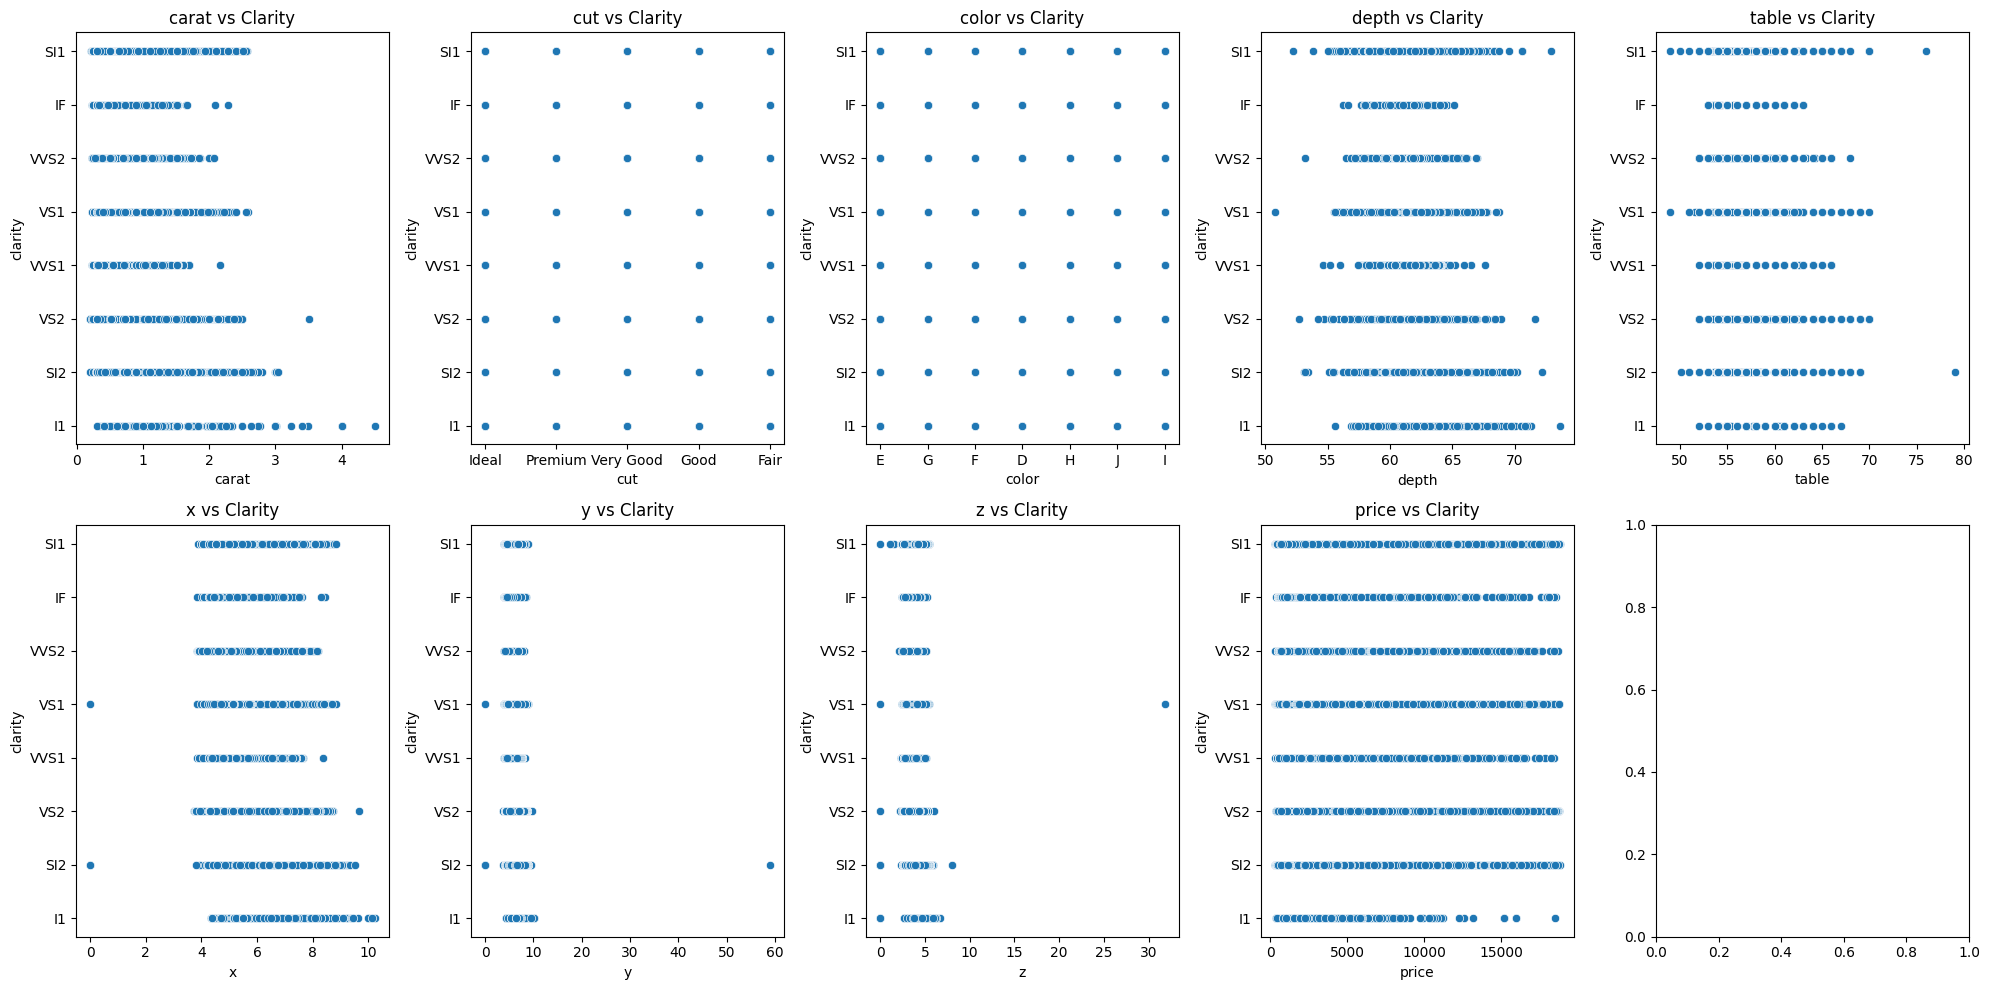

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to plot against 'clarity'
features = ['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z', 'price']

# Set up the figure for a 2-row grid layout (e.g., 5 plots in the first row and 4 in the second)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # Adjust the number of columns and rows as needed
axes = axes.flatten()  # Flatten the axes array to make it easier to index

# Loop through the features and plot
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='clarity', ax=axes[i])
    axes[i].set_title(f'{feature} vs Clarity')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [9]:
# Function to calculate outliers using IQR
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Calculate outliers for each numerical column
outlier_counts = {}
for col in numerical_cols:
    outlier_counts[col] = calculate_outliers(df[col])

# Print outlier counts
print("Outlier Counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


Outlier Counts:
S.No: 0 outliers
carat: 662 outliers
depth: 1225 outliers
table: 318 outliers
x: 15 outliers
y: 15 outliers
z: 23 outliers
price: 1779 outliers


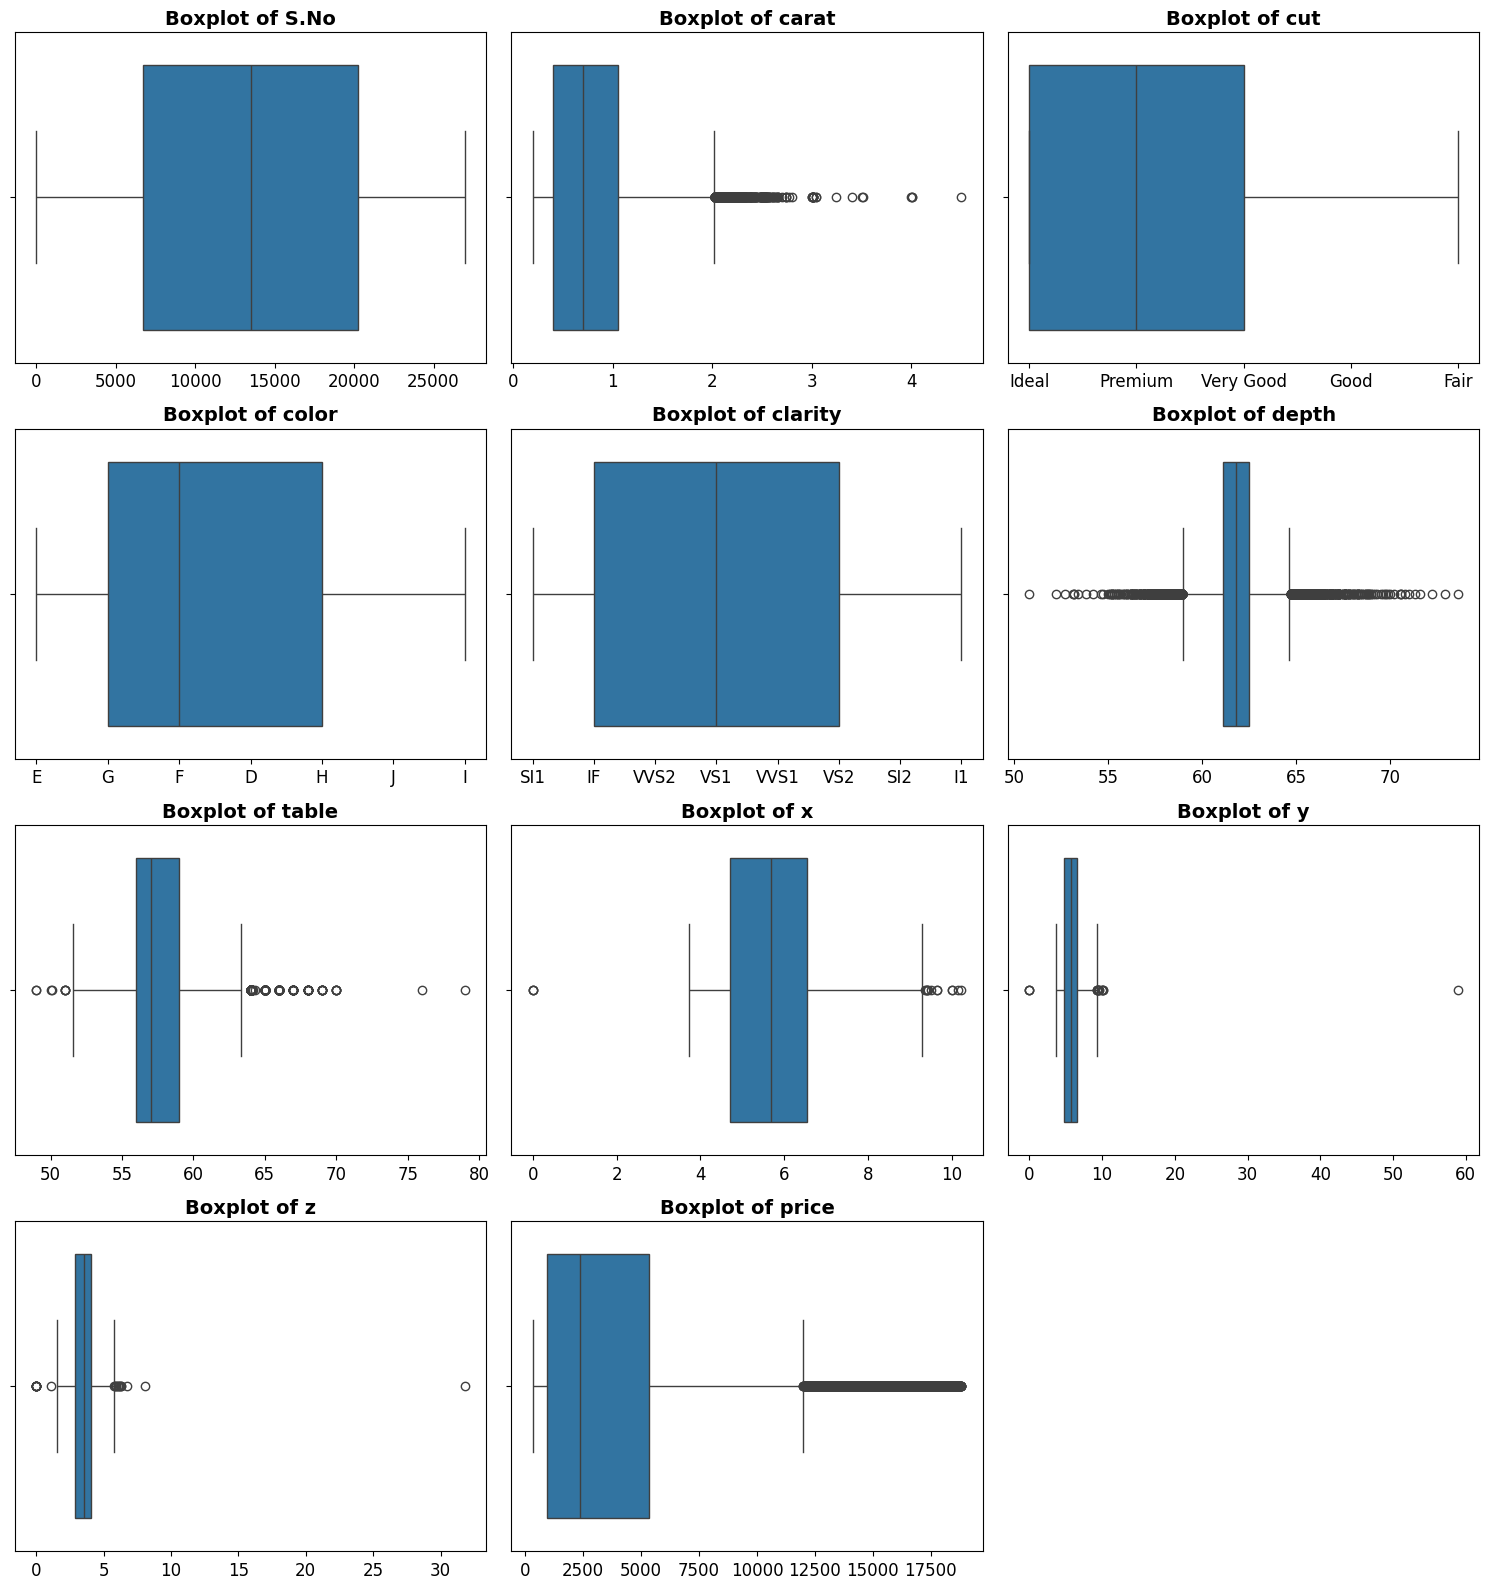

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a grid layout for the plots
num_cols = len(df.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')  # Consistent font style
    axes[i].set_xlabel('')  # Optional: Remove x-axis label for better readability
    axes[i].tick_params(axis='both', labelsize=12)  # Adjust font size for axis ticks

# Hide any extra subplots if columns are not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [10]:
#decide whether to do outliers tratment or not ,if do how?
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw



In [11]:
for i in ['x','y','z']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

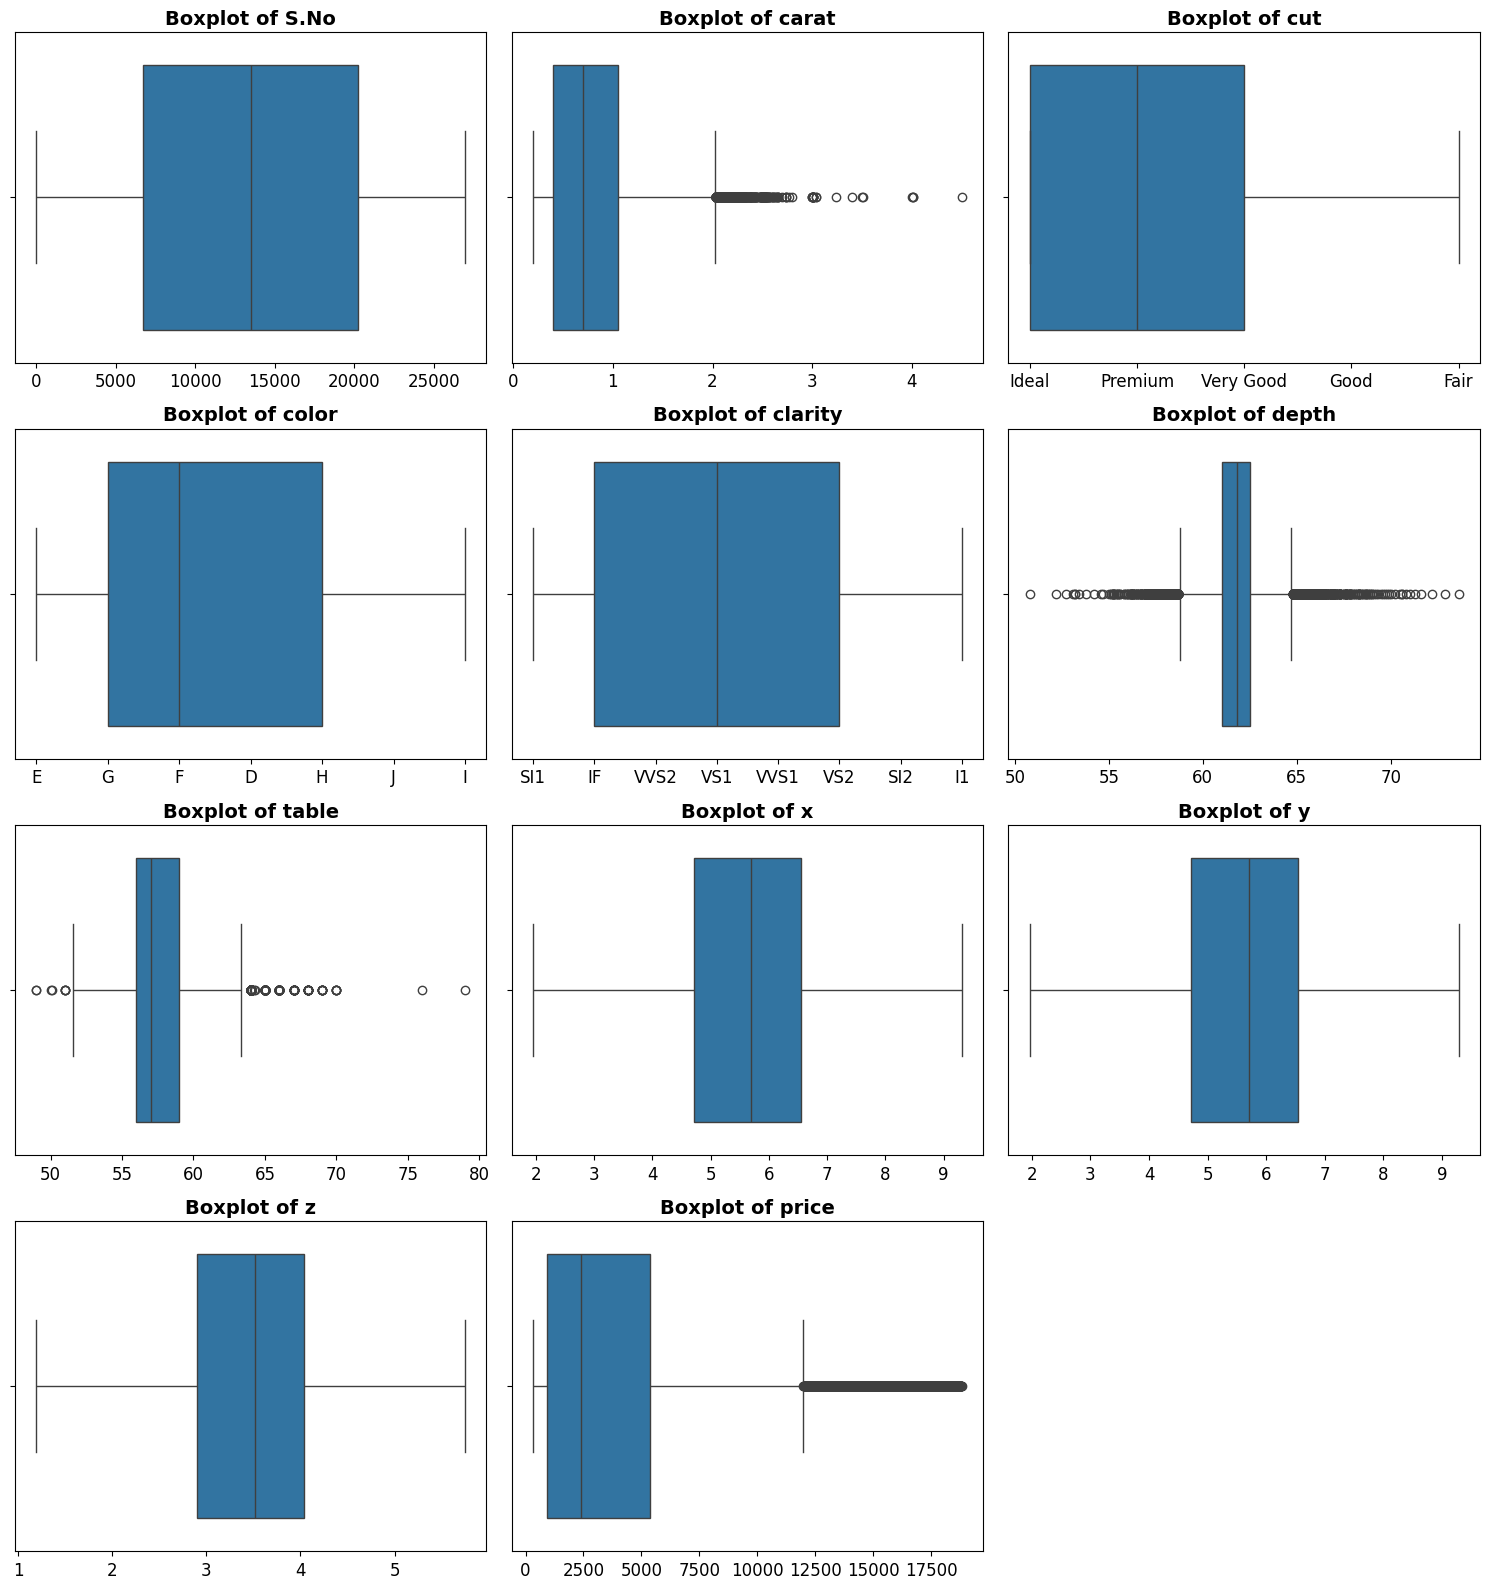

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a grid layout for the plots
num_cols = len(df.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')  # Consistent font style
    axes[i].set_xlabel('')  # Optional: Remove x-axis label for better readability
    axes[i].tick_params(axis='both', labelsize=12)  # Adjust font size for axis ticks

# Hide any extra subplots if columns are not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
data_encoded = df.copy()

for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(data_encoded)

        S.No  carat  cut  color  clarity  depth  table     x     y     z  \
0          1   0.30    2      1        2   62.1   58.0  4.27  4.29  2.66   
1          2   0.33    3      3        1   60.8   58.0  4.42  4.46  2.70   
2          3   0.90    4      1        7   62.2   60.0  6.04  6.12  3.78   
3          4   0.42    2      2        4   61.6   56.0  4.82  4.80  2.96   
4          5   0.31    2      2        6   60.4   59.0  4.35  4.43  2.65   
...      ...    ...  ...    ...      ...    ...    ...   ...   ...   ...   
26962  26963   1.11    3      3        2   62.3   58.0  6.61  6.52  4.09   
26963  26964   0.33    2      4        1   61.9   55.0  4.44  4.42  2.74   
26964  26965   0.51    3      1        5   61.7   58.0  5.12  5.15  3.17   
26965  26966   0.27    4      2        7   61.8   56.0  4.19  4.20  2.60   
26966  26967   1.25    3      6        2   62.0   58.0  6.90  6.88  4.27   

       price  
0        499  
1        984  
2       6289  
3       1082  
4        779

In [ ]:
# Drop the 'id'
data_encoded = data_encoded.drop(['S.No'], axis=1)

print(data_encoded.head())

   carat  cut  color  clarity  depth  table     x     y     z  price
0   0.30    2      1        2   62.1   58.0  4.27  4.29  2.66    499
1   0.33    3      3        1   60.8   58.0  4.42  4.46  2.70    984
2   0.90    4      1        7   62.2   60.0  6.04  6.12  3.78   6289
3   0.42    2      2        4   61.6   56.0  4.82  4.80  2.96   1082
4   0.31    2      2        6   60.4   59.0  4.35  4.43  2.65    779


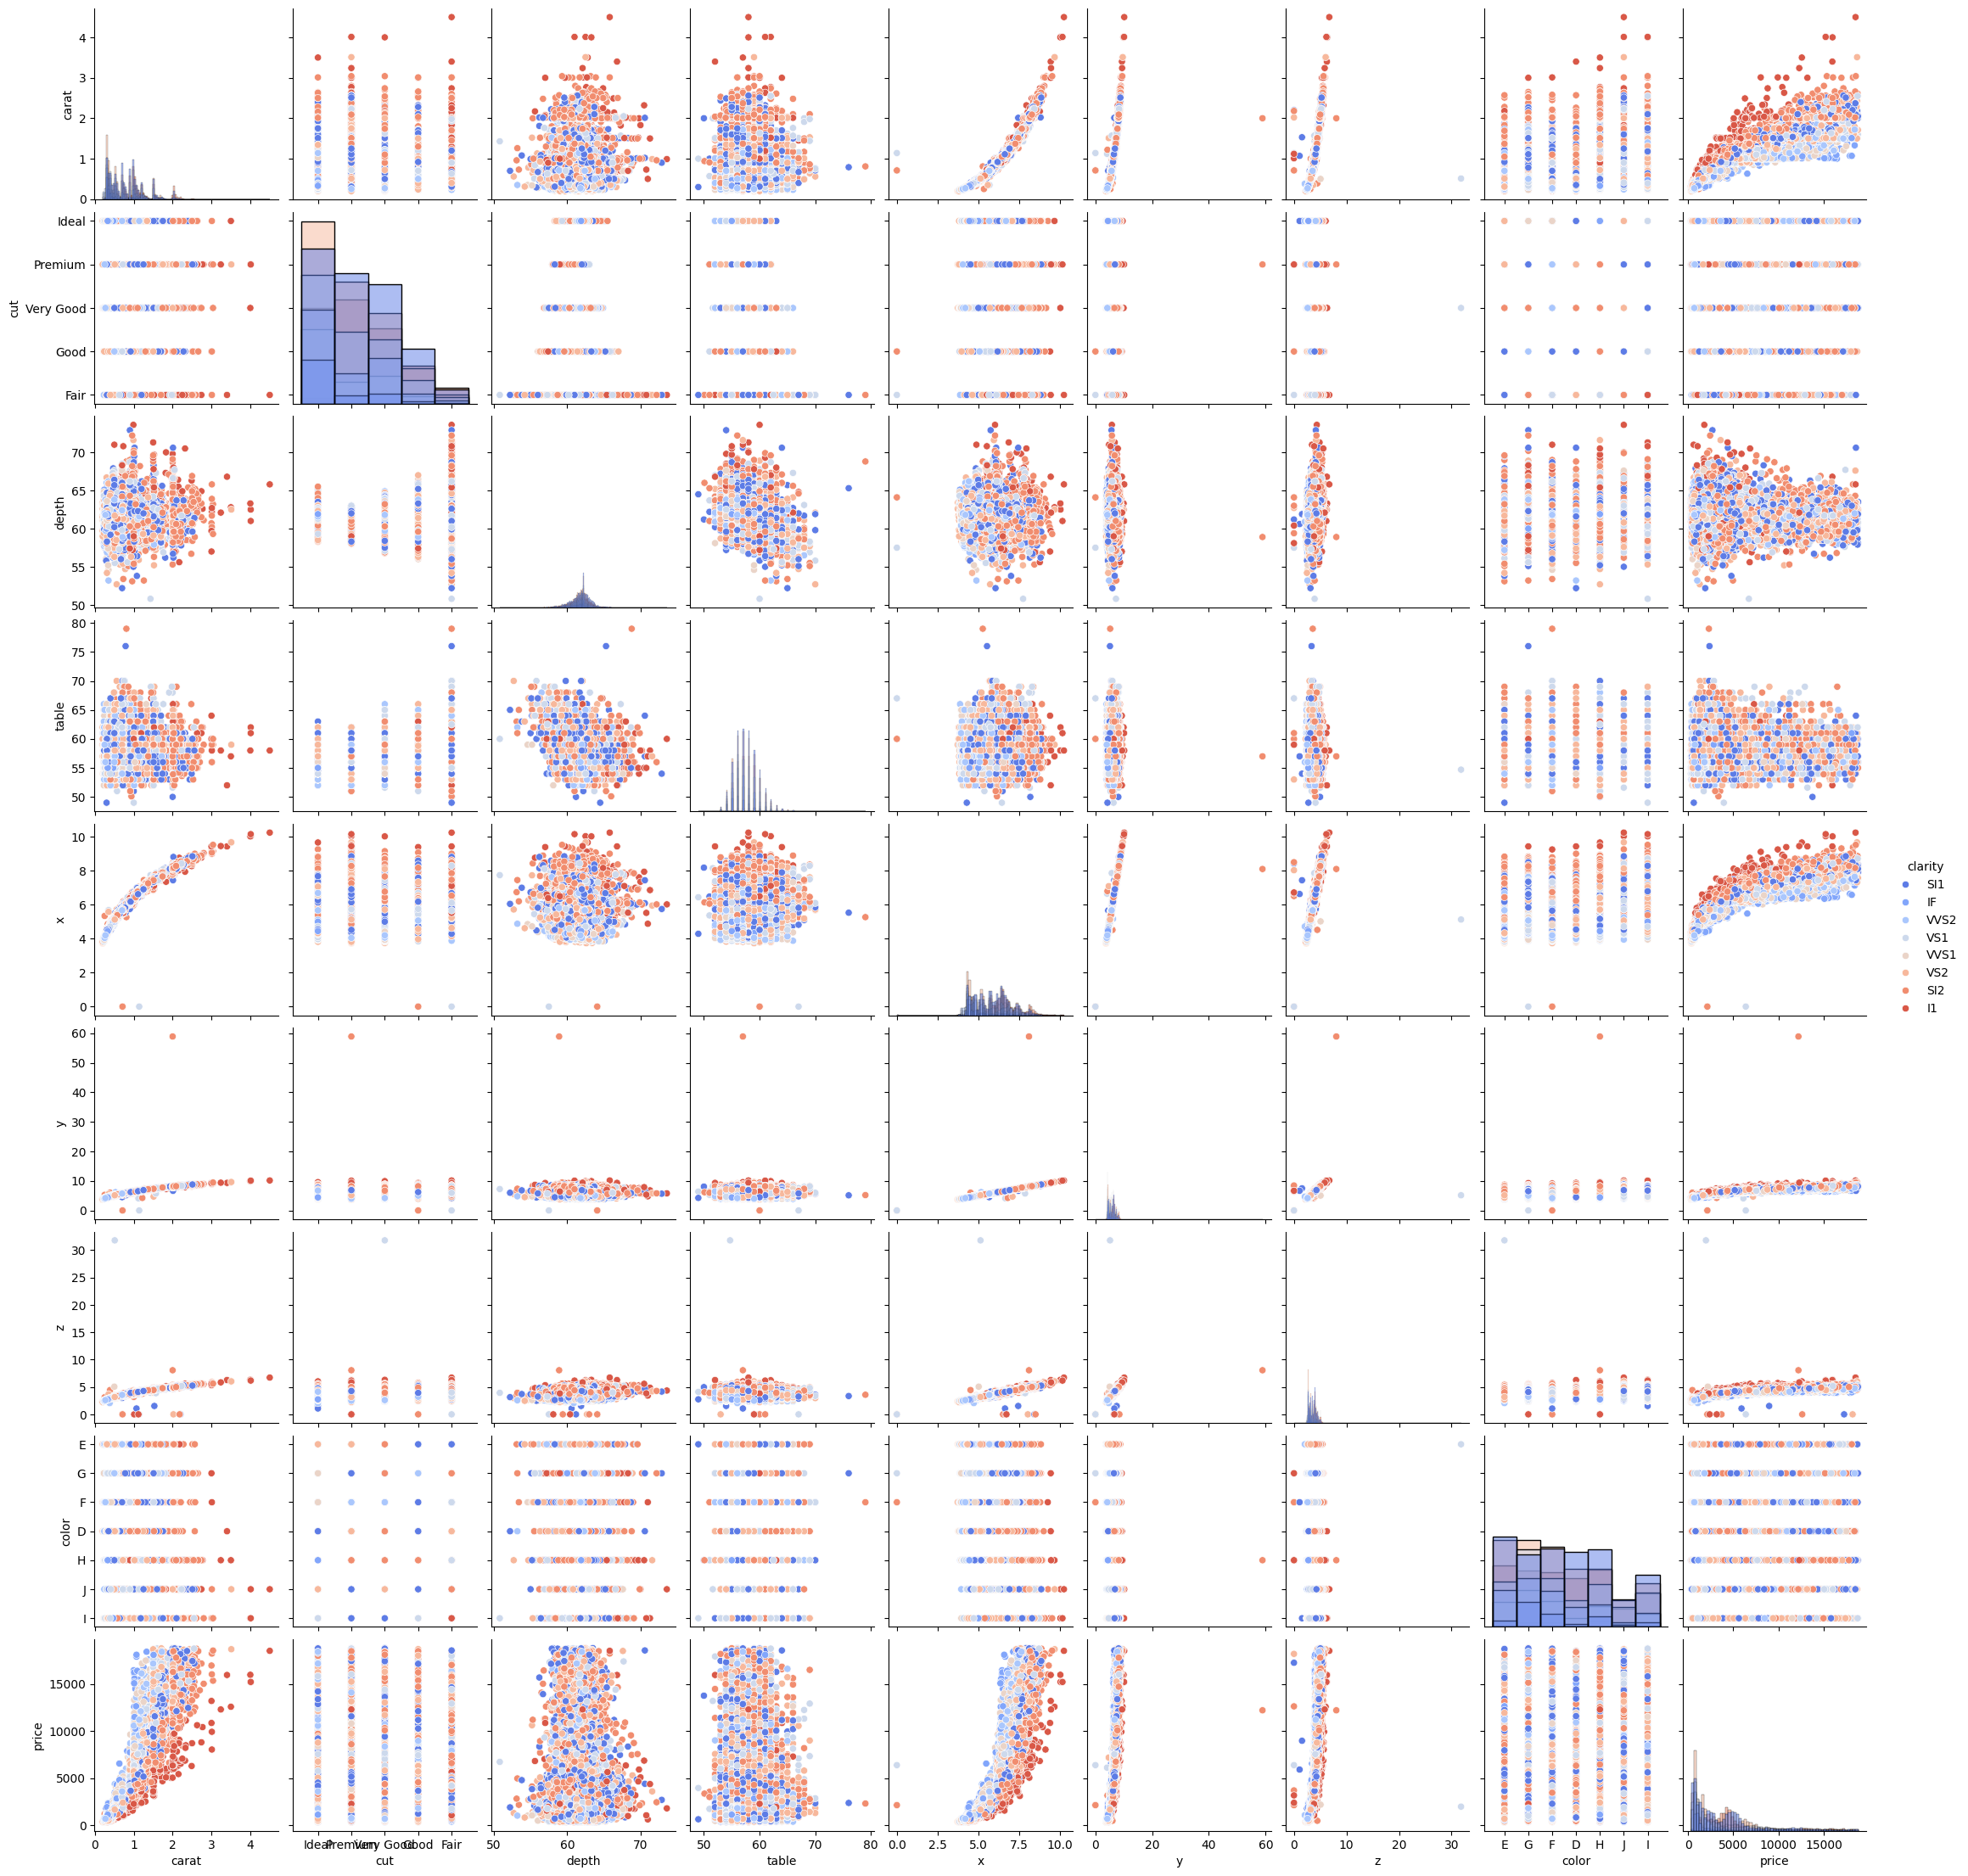

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Specify 'diag_kind' to handle categorical variables on the diagonal
sns.pairplot(
    df,
    hue='clarity',
    vars=['carat', 'cut', 'depth', 'table', 'x', 'y', 'z','color','price'],
    palette='coolwarm',
    markers='o',
    diag_kind='hist'  # Change diag_kind to 'hist' or 'kde' if appropriate
)
plt.show()

In [ ]:
s=data_encoded.corr()

<Axes: >

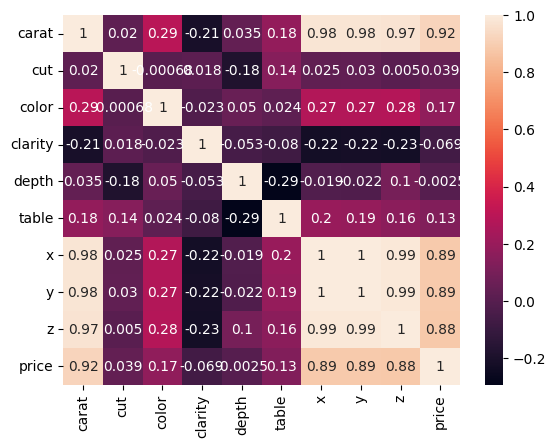

In [ ]:
sns.heatmap(s,annot=True)

In [ ]:
!pip install scikit-learn==1.0.2
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
# Step 3: Features and target
X = data_encoded.drop(columns=['clarity'])
y = data_encoded['clarity']

In [ ]:
data_encoded['clarity'].value_counts()

,count
clarity,
2,6571
5,6099
3,4575
4,4093
7,2531
6,1839
1,894
0,365


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Convert back to a DataFrame
X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
y_balanced_df = pd.DataFrame(y_balanced, columns=['clarity'])

# Combine the balanced features and target into one DataFrame
balanced_data = pd.concat([X_balanced_df, y_balanced_df], axis=1)

# Display the updated DataFrame
print("Original DataFrame:")
print(data_encoded)
print("\nBalanced DataFrame:")
print(balanced_data)

Original DataFrame:
       carat  cut  color  clarity  depth  table     x     y     z  price
0       0.30    2      1        2   62.1   58.0  4.27  4.29  2.66    499
1       0.33    3      3        1   60.8   58.0  4.42  4.46  2.70    984
2       0.90    4      1        7   62.2   60.0  6.04  6.12  3.78   6289
3       0.42    2      2        4   61.6   56.0  4.82  4.80  2.96   1082
4       0.31    2      2        6   60.4   59.0  4.35  4.43  2.65    779
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...
26962   1.11    3      3        2   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33    2      4        1   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    3      1        5   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27    4      2        7   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    3      6        2   62.0   58.0  6.90  6.88  4.27   5166

[26967 rows x 10 columns]

Balanced DataFrame:
          carat  cut  color      depth      table       

In [ ]:
balanced_data.columns

Index(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z', 'price',
       'clarity'],
      dtype='object')

In [ ]:
balanced_data['clarity'].value_counts()

,count
clarity,
2,6571
1,6571
7,6571
4,6571
6,6571
5,6571
3,6571
0,6571


In [ ]:
# Step 3: Features and target
X = balanced_data.drop(columns=['clarity'])
y = balanced_data['clarity']

In [ ]:
# prompt: svm rbl

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the SVM model
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2628
           1       0.48      0.74      0.58      2628
           2       0.45      0.54      0.49      2629
           3       0.79      0.66      0.72      2629
           4       0.35      0.27      0.31      2629
           5       0.37      0.30      0.33      2628
           6       0.34      0.33      0.33      2629
           7       0.38      0.33      0.35      2628

    accuracy                           0.51     21028
   macro avg       0.51      0.51      0.51     21028
weighted avg       0.51      0.51      0.51     21028

[[2502    0   70   39    1   10    4    2]
 [   1 1935   12    0   92   24  404  160]
 [  21   73 1407  324  186  432   77  109]
 [ 124   22  554 1725   53  109   13   29]
 [   7  280  313   31  717  511  351  419]
 [   2  195  655   69  448  781  265  213]
 [   0  957   35    0  198   63  868  508]
 [   2  555   94    5  349  173  573  877]]


In [ ]:
from sklearn.model_selection import train_test_split

# Step 5: Split the balanced data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(
    X_balanced, y_balanced,test_size=0.3, random_state=42, stratify=y_balanced
)

In [ ]:
# prompt: random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(a_train, b_train)

# Make predictions on the test set
b_pred = rf_classifier.predict(a_test)

# Evaluate the model
print(classification_report(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1971
           1       0.89      0.91      0.90      1971
           2       0.63      0.66      0.64      1971
           3       0.79      0.83      0.81      1972
           4       0.65      0.60      0.62      1972
           5       0.62      0.58      0.60      1971
           6       0.80      0.79      0.79      1972
           7       0.75      0.74      0.75      1971

    accuracy                           0.77     15771
   macro avg       0.76      0.77      0.76     15771
weighted avg       0.76      0.77      0.76     15771



NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(b_test, b_pred))

[[1959    0    0   12    0    0    0    0]
 [   0 1798    3    0   15    9  111   35]
 [   0    1 1300  315   89  241    7   18]
 [  32    0  257 1644   11   26    0    2]
 [   0   25  143   29 1190  346   81  158]
 [   1    1  350   76  303 1153   33   54]
 [   0  115    3    0   54   29 1559  212]
 [   0   70   20    3  182   61  168 1467]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # Import confusion_matrix
print(confusion_matrix(b_test, b_pred))

[[1959    0    0   12    0    0    0    0]
 [   0 1798    3    0   15    9  111   35]
 [   0    1 1300  315   89  241    7   18]
 [  32    0  257 1644   11   26    0    2]
 [   0   25  143   29 1190  346   81  158]
 [   1    1  350   76  303 1153   33   54]
 [   0  115    3    0   54   29 1559  212]
 [   0   70   20    3  182   61  168 1467]]


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 42056, number of used features: 9
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

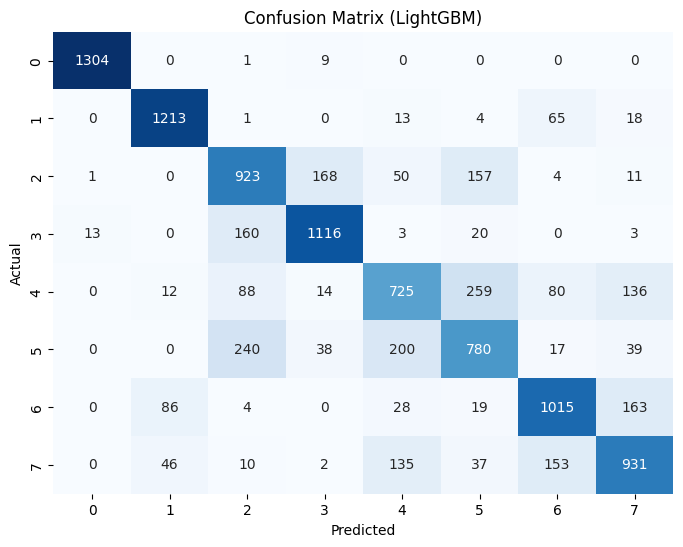

NameError: name 'lgb' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split




# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Optional: Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 8],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [31, 50],
    'scale_pos_weight': [1, 5]
}

# Perform RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_distributions=param_grid,
    scoring='balanced_accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    n_iter=30,  # Randomly sample 30 parameter combinations
    random_state=42
)
randomized_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_params = randomized_search.best_params_
print(f"Best Parameters: {best_params}")

best_lgb_model = randomized_search.best_estimator_

# Predictions and evaluation
y_pred = best_lgb_model.predict(X_test)

print("\nBalanced Accuracy Score:")
print(balanced_accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (LightGBM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
lgb.plot_importance(best_lgb_model, max_num_features=10, importance_type='gain', title='Feature Importance')
plt.show()


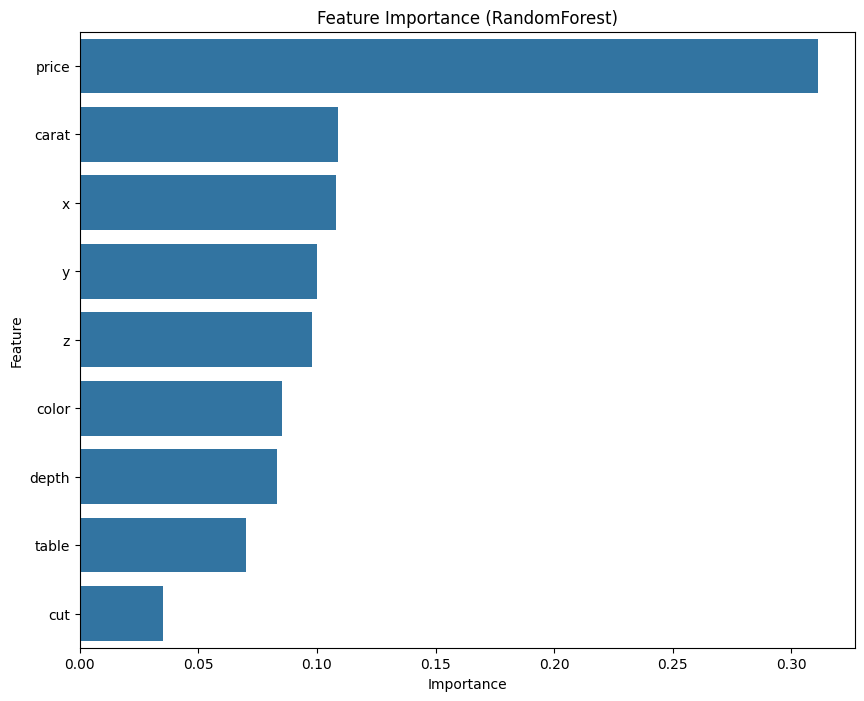

In [ ]:
# Feature Importance Visualization for RandomForest

from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

plt.figure(figsize=(10, 8))

# Train a Random Forest Classifier (if not already trained)
rf = RandomForestClassifier(random_state=42, n_estimators=100)  # Define and train rf
rf.fit(X_train, y_train)

# Get feature importances from the RandomForest model
importances = rf.feature_importances_
feature_names = X.columns # Assuming X is your feature DataFrame

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Top 10 features
plt.title("Feature Importance (RandomForest)")
plt.show()

In [ ]:
# Feature Importance Visualization
import xgboost as xgb #import the xgboost library
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10, title="Feature Importance") #Call plot_importance via xgb
plt.show()

NameError: name 'best_model' is not defined

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

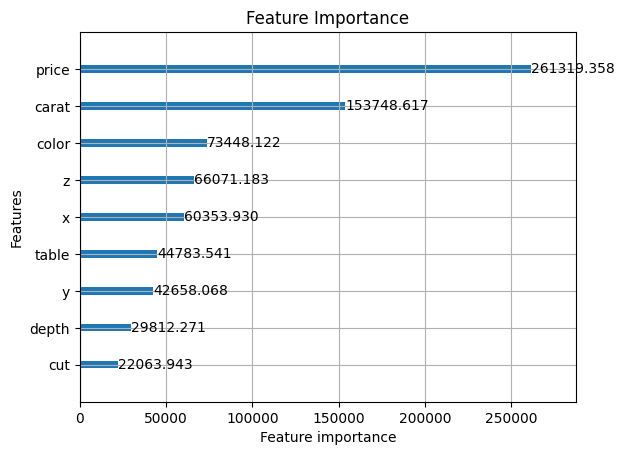

In [ ]:
from lightgbm import plot_importance  # Import plot_importance

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plot_importance(best_lgb_model, max_num_features=10, importance_type='gain', title='Feature Importance') # Call plot_importance directly
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Calculate class weights (for multi-class classification)
class_weights = {class_label: len(y_train) / (len(np.unique(y_train))) for class_label in np.unique(y_train)}

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [9],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Initialize XGBClassifier without use_label_encoder and num_class
xgb_classifier = XGBClassifier(
    random_state=42,
    objective='multi:softmax',
    eval_metric="mlogloss"
)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_model = grid_search.best_estimator_

# Fit the model using the calculated class weights
best_model.fit(X_train, y_train, sample_weight=[class_weights[y] for y in y_train])

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   4.2s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   3.9s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   7.5s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   4.0s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   4.0s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  10.7s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  10.3s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  10.2s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   8.2s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   9.8s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  12.9s
[CV] END ...learning_rate=0.1, max_depth=9, n_es

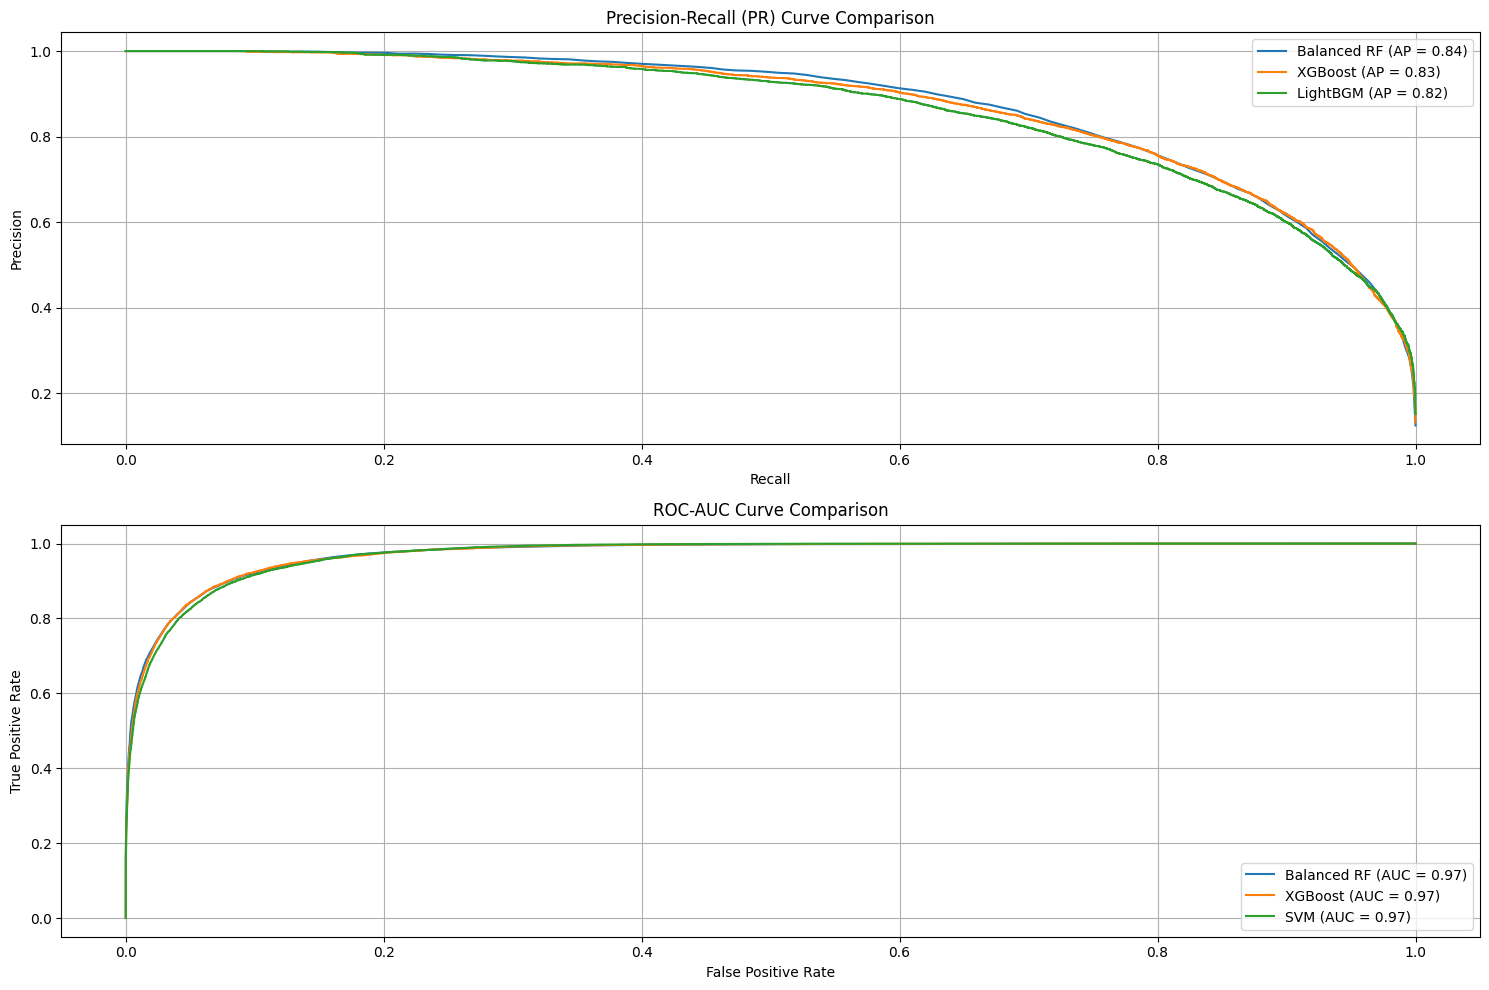

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize  # Import label_binarize

# Initialize figure for PR and ROC-AUC curves
plt.figure(figsize=(15, 10))

# *Subplot for PR Curves*
plt.subplot(2, 1, 1)
plt.title("Precision-Recall (PR) Curve Comparison")

# Binarize y_test for multi-class calculations
y_test_bin = label_binarize(y_test, classes=list(set(y_test))) # Define y_test_bin

for model_name, model in [
    ("Balanced RF", rf),
    ("XGBoost", best_model),
    ("LightBGM", best_lgb_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Calculate average precision across all classes
    avg_precision = average_precision_score(y_test_bin, y_scores, average="macro")

    # Compute a macro-average PR curve
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid(True)

# *Subplot for ROC-AUC Curves*
plt.subplot(2, 1, 2)
plt.title("ROC-AUC Curve Comparison")

for model_name, model in [
    ("Balanced RF", rf),
    ("XGBoost", best_model),
    ("SVM", best_lgb_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Compute a macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel()) # Use y_test_bin here as well
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()

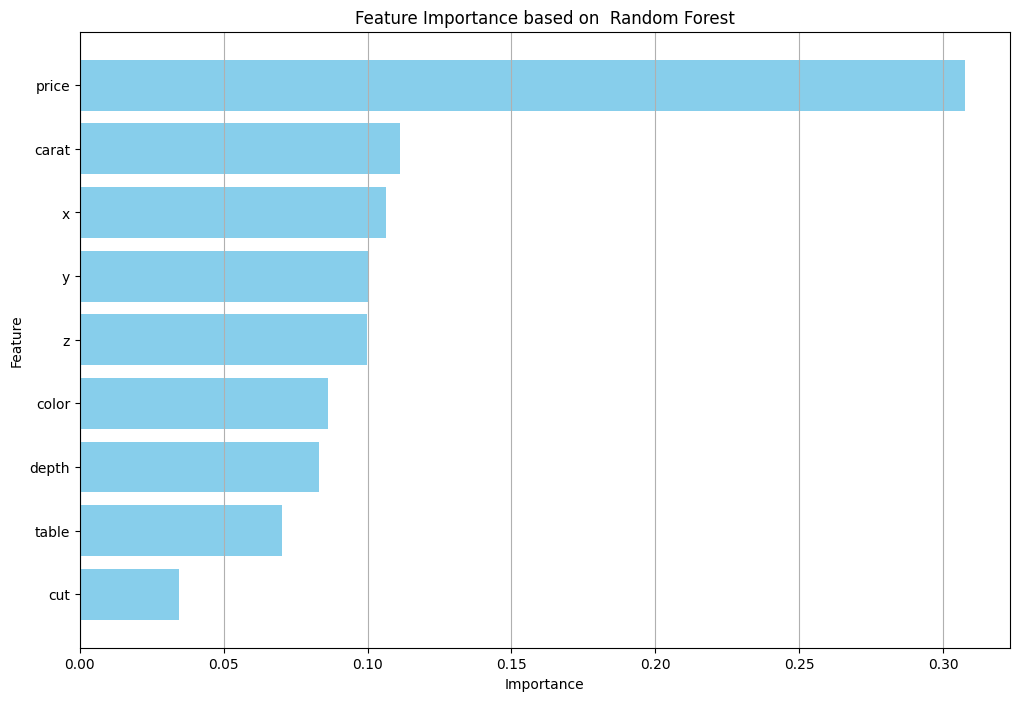

Top 10 Features based on Balanced Random Forest Feature Importance:
  Feature  Importance
8   price    0.307830
0   carat    0.111285
5       x    0.106601
6       y    0.100465
7       z    0.099676
2   color    0.086263
3   depth    0.083089
4   table    0.070188
1     cut    0.034603


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on  Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Top 10 Features based on Balanced Random Forest Feature Importance:")
print(top_10_features)

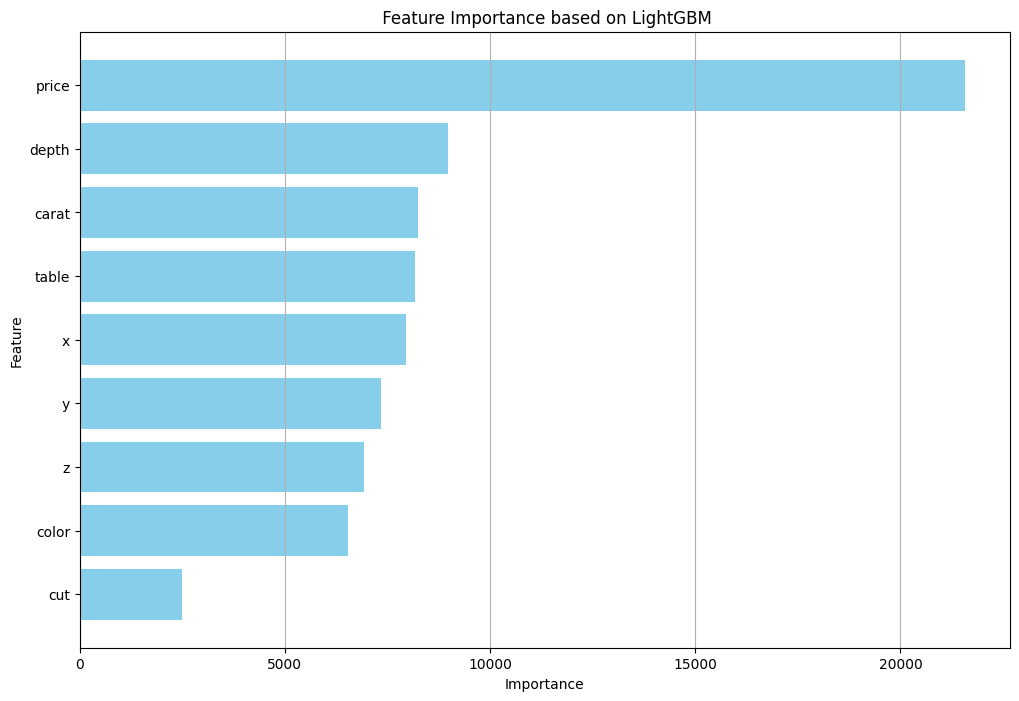

Feature Importance based on LightGBM
  Feature  Importance
8   price       21586
3   depth        8969
0   carat        8251
4   table        8171
5       x        7956
6       y        7351
7       z        6921
2   color        6544
1     cut        2492


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_lgb_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title(" Feature Importance based on LightGBM")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Feature Importance based on LightGBM")
print(top_10_features)

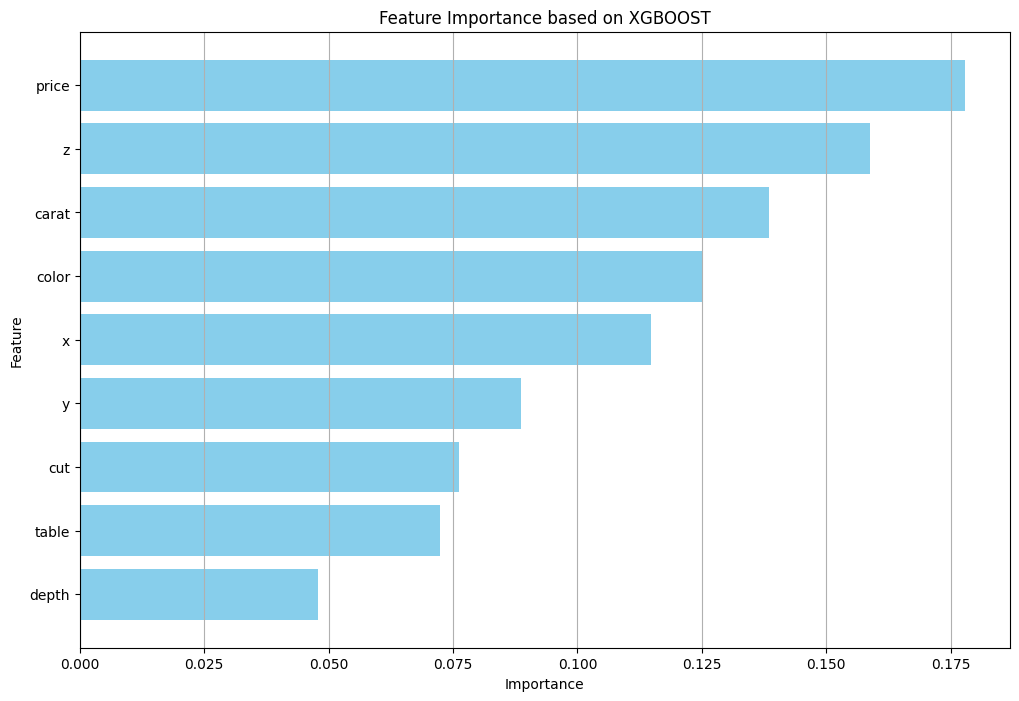

Feature Importance based on XGBOOST
  Feature  Importance
8   price    0.177972
7       z    0.158757
0   carat    0.138410
2   color    0.125095
5       x    0.114775
6       y    0.088629
1     cut    0.076159
4   table    0.072287
3   depth    0.047916


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on XGBOOST")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Feature Importance based on XGBOOST")
print(top_10_features)

In [ ]:
# Step 3: Features and target
X1 = balanced_data.drop(columns=['clarity'])
y1 = balanced_data['clarity']

In [ ]:
# Importing Libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define SVM Model
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict and Calculate Initial Accuracy
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy of the SVM model: {accuracy:.2f}")

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 'scale', 'auto'],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# Best Model from GridSearch
best_svm = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")

# Predict and Calculate Accuracy after Tuning
y_pred_tuned = best_svm.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy after Hyperparameter Tuning: {tuned_accuracy:.2f}")


Initial Accuracy of the SVM model: 0.51
Fitting 5 folds for each of 20 candidates, totalling 100 fits
